In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


In [3]:
mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Long_term_tracking_Rez87.mat")

In [4]:
train__ = mat_data["S"][0][0]
train__ = torch.tensor(train__)
m, k1 = 318, 5
net = Neural_NMF([m, k1])
history = train(net, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


In [5]:
A = history[0][0]
B = history[1][0]
A1 = A.detach().numpy()
B1 = B.detach().numpy()

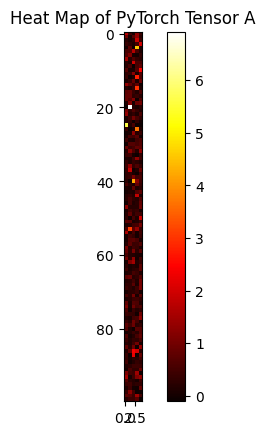

In [7]:
plt.imshow(A1[:100,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

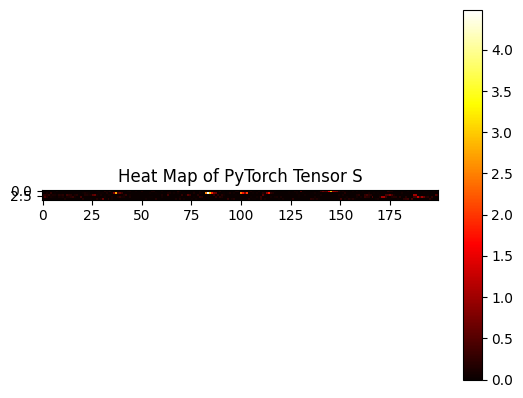

In [12]:
plt.imshow(B1[:,300:500], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()